# [Linear Regression (With Scikit-Learn)](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)

   1. [Scikit-Learn Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
   2. [Scikit-Learn LR Score](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)
   3. [Mean Square Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
   4. [Cross Validation Score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Importing sales and advertising channels data

adv = pd.read_csv('../../data/advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales,Region
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,9.3,1
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1


In [3]:
# Split data into train and test

train, test = train_test_split(adv,
                               test_size=0.3,
                               random_state=1)


# Convert train test splits to dataframes, for convenience

train = pd.DataFrame(data=train,
                     columns=adv.columns)

test = pd.DataFrame(data=test,
                    columns=adv.columns)

### Plot the Radio spending against the Sales

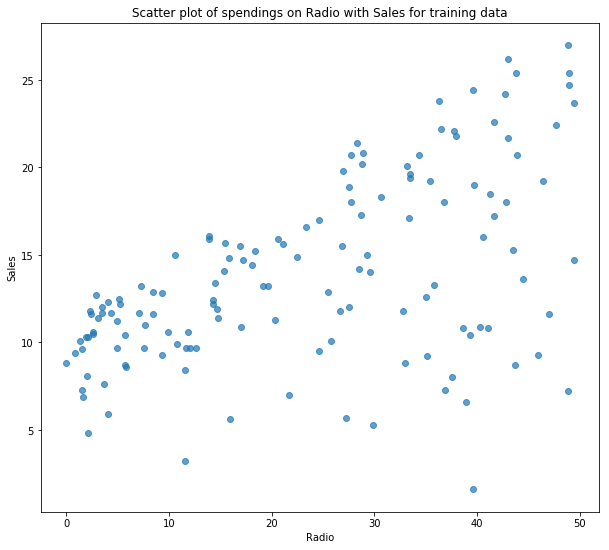

In [4]:
plt.figure(figsize=(10,9))

plt.scatter(train.Radio,
            train.Sales,
            alpha=0.7)  # Plot the raw data

plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on Radio with Sales for training data')

plt.show()

### Plot the Newspaper spending against the Sales

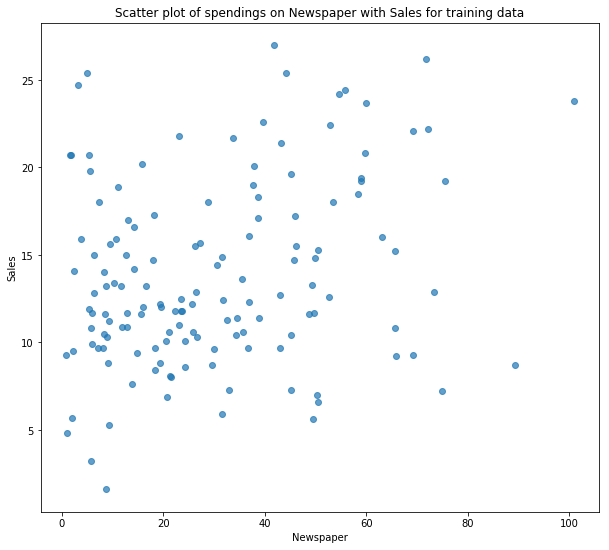

In [5]:
plt.figure(figsize=(10,9))

plt.scatter(train.Newspaper,
            train.Sales,
            alpha=0.7)  # Plot the raw data

plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on Newspaper with Sales for training data')

plt.show()

### Plot the TV spending against the Sales

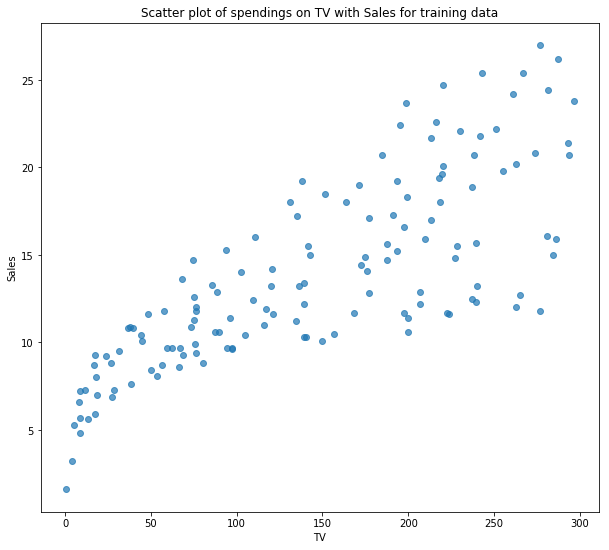

In [6]:
plt.figure(figsize=(10,9))

plt.scatter(train.TV,
            train.Sales,
            alpha=0.7)  # Plot the raw data

plt.xlabel("TV")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on TV with Sales for training data')

plt.show()

### Plot the Region against the Sales

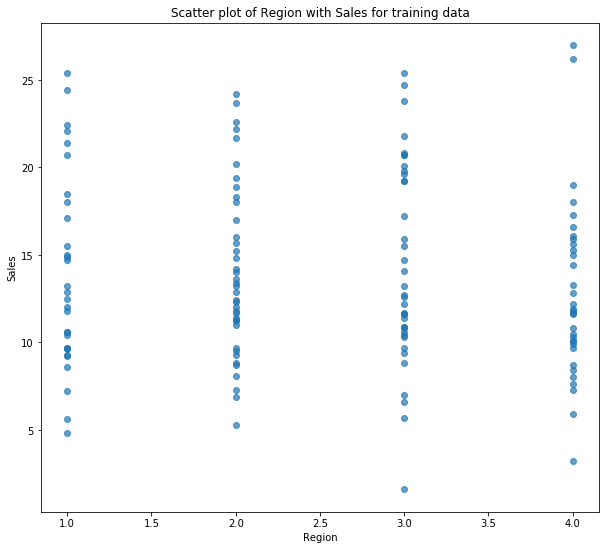

In [7]:
plt.figure(figsize=(10,9))

plt.scatter(train.Region,
            train.Sales,
            alpha=0.7)  # Plot the raw data

plt.xlabel("Region")
plt.ylabel("Sales")
plt.title('Scatter plot of Region with Sales for training data')

plt.show()

### Fitting a Model with `LinearRegression()`

In [8]:
# Fit a linear regression model using OLS

from sklearn.linear_model import LinearRegression
# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

slm = LinearRegression()
slm.fit(train['Radio'][:,np.newaxis],
        train['Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Evaluate the output for the model fitted on the training data

intercept = slm.intercept_
coef = slm.coef_
score = slm.score(test['Radio'][:,np.newaxis],
                  test['Sales'])

print('Linear Regression model score for the training data is {}'.format(score))
print('Linear Regression model coeficient for the training data is {}'.format(coef))
print('Linear Regression model intercept for the training data is {}'.format(intercept))

# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

Linear Regression model score for the training data is 0.41293932917162335
Linear Regression model coeficient for the training data is [0.1874808]
Linear Regression model intercept for the training data is 9.440936561425886


### EXERCISE: (10 min)
1. Given coefficient estimates, predict the y-value for `train.Radio.min()` & `train.Radio.max()`
2. Create a scatter plot that also shows the data and the line of best fit

***Hint***: Use the following convention `plt.plot([x_min, x_max], [y_min, y_max])` and `plt.scatter(x, y)` next to each other

In [10]:
# Evaluate the fit of the model based off of the training set

preds = slm.predict(test['Radio'][:,np.newaxis])

from sklearn.metrics import mean_squared_error
# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


mse = np.sqrt(mean_squared_error(test['Sales'],
                                 preds))

print('Mean sqauared error for Linear Regression model is {}'.format(mse))

Mean sqauared error for Linear Regression model is 3.8215351050686674


In [11]:
# Evaluate the model fit based off of cross validation

from sklearn.model_selection import cross_val_score
# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

scores = cross_val_score(slm, adv['Radio'][:,np.newaxis],
                         adv['Sales'],
                         cv=3,
                         scoring='neg_mean_squared_error')

mscvs = np.mean(np.sqrt(-scores))

print('Mean squared cross validation score for Linear Regression model is {}'.format(mscvs))

Mean squared cross validation score for Linear Regression model is 4.269163534741655


### EXERCISE: (10 min)
1.  Run a multiple regression with Radio and TV. 
    + Which coefficient has a higher value?
    + What does this suggest practically?
2.  Calculate the 5-fold CV RMSE. Is it better or worse than before?

In [12]:
# 1) 
# Evaluate the fit of the model based off of the training set

# 2)
# Evaluate the model fit based off of cross validation

### INTERACTION TERMS
**What:** Interaction measure the combined effect of two variables acting together

**Why:**  This is a way to make predictions and inferences when two input variables are correlated with each other

---

**Note:** Whenever you include an interaction terms, it is conventional to include the main effects as well

In [13]:
# Creating a interaction variable using expenses on Radio and TV

train['Radio_TV'] = train['Radio'] * train['TV']
lmi = LinearRegression()


# Fitting the model using new interaction variable created

lmi.fit(train[['TV', 'Radio', 'Radio_TV']],
        train['Sales'])

lmi_coef = lmi.coef_ 

### EXERCISE: (10 min)
1. Check to see if any interaction terms are worth including in the model